In [1]:
# Import of libraries

# System libraries
import re
import string
import unicodedata
import itertools
from collections import Counter

# Library for file manipulation
import pandas as pd
import numpy as np
import pandas

# Data visualization
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt

# Configuration for graph width and layout
sns.set_theme(style='whitegrid')
palette='viridis'

# Warnings remove alerts
import warnings
warnings.filterwarnings("ignore")

# Python version
from platform import python_version
print('Python version in this Jupyter Notebook:', python_version())

# Load library versions
import watermark

# Library versions
%reload_ext watermark
%watermark -a "Library versions" --iversions

Python version in this Jupyter Notebook: 3.10.0
Author: Library versions

numpy     : 2.1.2
matplotlib: 3.9.2
platform  : 1.0.8
watermark : 2.5.0
plotly    : 5.24.1
pandas    : 2.2.3
re        : 2.2.1
seaborn   : 0.13.2



In [2]:
data = pd.read_csv("../data/Brent_Oil_Prices.csv")
data

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
...,...,...
9006,"Nov 08, 2022",96.85
9007,"Nov 09, 2022",93.05
9008,"Nov 10, 2022",94.25
9009,"Nov 11, 2022",96.37


In [3]:
data.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [4]:
data.tail()

,Date,Price
9006,"Nov 08, 2022",96.85
9007,"Nov 09, 2022",93.05
9008,"Nov 10, 2022",94.25
9009,"Nov 11, 2022",96.37
9010,"Nov 14, 2022",93.59


In [5]:
data.shape

(9011, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB


In [7]:
data.dtypes

Date      object
Price    float64
dtype: object

In [8]:
data

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
...,...,...
9006,"Nov 08, 2022",96.85
9007,"Nov 09, 2022",93.05
9008,"Nov 10, 2022",94.25
9009,"Nov 11, 2022",96.37


In [9]:
# Check the first few rows of the 'Year' column to understand the format

print(data['Date'].unique())

['20-May-87' '21-May-87' '22-May-87' ... 'Nov 10, 2022' 'Nov 11, 2022'
 'Nov 14, 2022']


In [10]:
# Convert the 'date' column to datetime format, automatically inferring the format
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True, errors='coerce')  # 'dayfirst=True' for formats like "20-May-87"

# Check if the conversion was done correctly
#print(df.head())

# Check if there were any invalid values after the conversion
print(data['Date'].isnull().sum())  # To ensure all dates were correctly converted

# Remove possible null values caused by invalid dates
data = data.dropna(subset=['Date'])

# Set the 'date' column as the index
data.set_index('Date', inplace=True)

# Check the index to ensure the date is now a DatetimeIndex
print(data.index)

0
DatetimeIndex(['1987-05-20', '1987-05-21', '1987-05-22', '1987-05-25',
               '1987-05-26', '1987-05-27', '1987-05-28', '1987-05-29',
               '1987-06-01', '1987-06-02',
               ...
               '2022-11-01', '2022-11-02', '2022-11-03', '2022-11-04',
               '2022-11-07', '2022-11-08', '2022-11-09', '2022-11-10',
               '2022-11-11', '2022-11-14'],
              dtype='datetime64[ns]', name='Date', length=9011, freq=None)


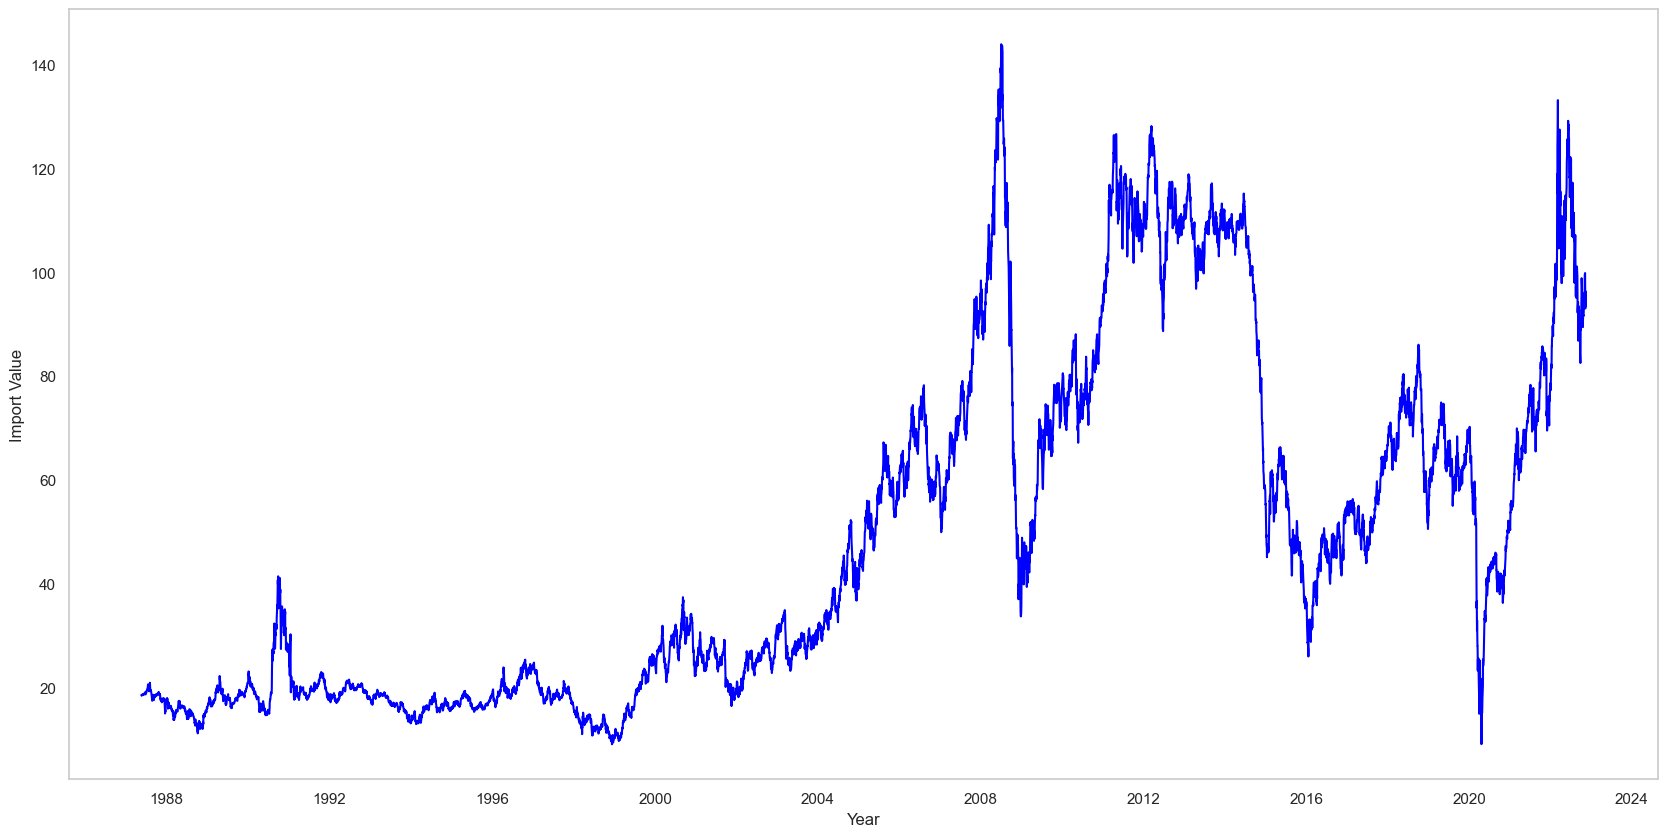

In [11]:
# Plot the trend of coffee imports over time

plt.figure(figsize=(20.5, 10))
plt.plot(data.index, data['Price'], color='blue')
plt.title('')
plt.xlabel('Year')
plt.ylabel('Import Value')
plt.grid(False)
plt.show()

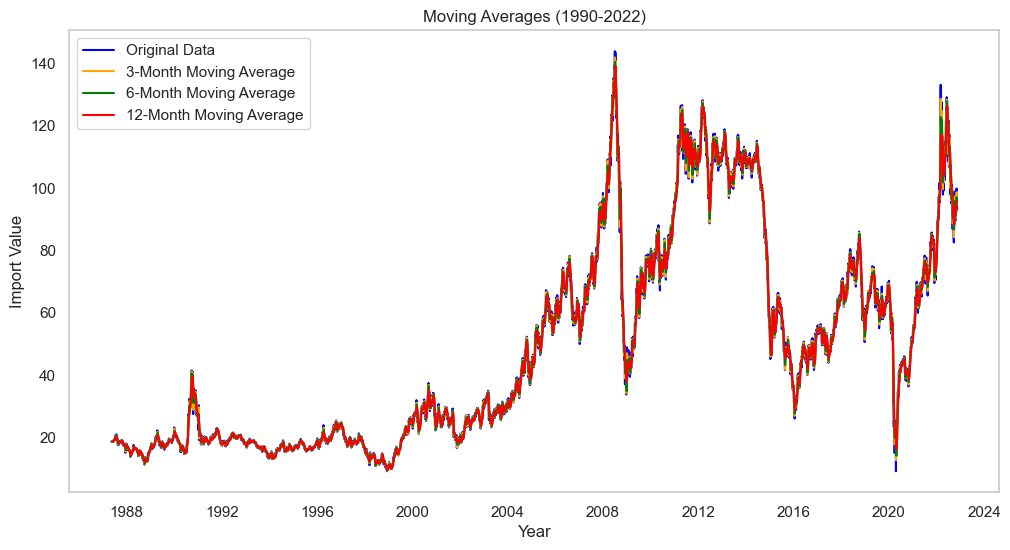

In [12]:
# Calculate the Simple Moving Average (SMA) with different window sizes

data['SMA_3'] = data['Price'].rolling(window=3).mean()  # 3-month moving average
data['SMA_6'] = data['Price'].rolling(window=6).mean()  # 6-month moving average
data['SMA_12'] = data['Price'].rolling(window=12).mean()  # 12-month moving average

# Plot the original data and the moving averages
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Price'], label='Original Data', color='blue')
plt.plot(data.index, data['SMA_3'], label='3-Month Moving Average', color='orange')
plt.plot(data.index, data['SMA_6'], label='6-Month Moving Average', color='green')
plt.plot(data.index, data['SMA_12'], label='12-Month Moving Average', color='red')

# Add titles and labels
plt.title('Moving Averages (1990-2022)')
plt.xlabel('Year')
plt.ylabel('Import Value')
plt.legend()
plt.grid(False)
plt.show()

In [13]:
# Feature engineering: Create 'Month' and 'Year' features for the model

data['Month'] = data.index.month
data['Year'] = data.index.year

In [14]:
# Define the features (X) and the target variable (y)

X = data[['Month', 'Year']]  # We can use 'Month' and 'Year' as features for simplicity
y = data['Price']  # The target variable is the 'Value of Import'

In [19]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Initialize XGBRegressor with GPU parameters

xgboost_model = XGBRegressor(objective='reg:squarederror',  # Objective for regression
                             n_estimators=1000,             # Increase the number of trees (epochs) for monitoring
                             learning_rate=0.1,             # Learning rate (step size shrinkage)
                             max_depth=6,                   # Maximum depth of each tree (controls model complexity)
                             subsample=0.8,                 # Subsample ratio of training instances
                             colsample_bytree=0.8,          # Subsample ratio of features when constructing each tree
                             gamma=0,                       # Minimum loss reduction required to make a split
                             reg_alpha=0.01,                # L1 regularization (Lasso)
                             reg_lambda=1,                  # L2 regularization (Ridge)
                             min_child_weight=1,            # Minimum sum of instance weight needed in a child node
                             booster='gbtree',              # Use tree-based boosters (default)
                             random_state=42,               # Seed for reproducibility
                             verbosity=1                   # Verbosity level of model training output (set to 1 for warnings)
                            )

# Define evaluation set
eval_set = [(X_train, y_train), (X_test, y_test)]

# Train the model with evaluation metric and early stopping
xgboost_model.fit(X_train, y_train,
                  eval_set=eval_set,                   # Evaluation set for monitoring
                  verbose=True                         # Output training information at each epoch
                 )

ImportError: sklearn needs to be installed in order to use this module

In [20]:
# Make predictions on the test set
y_pred = xgboost_model.predict(X_test)

In [21]:
# Calculate residuals
residuals = y_test - y_pred

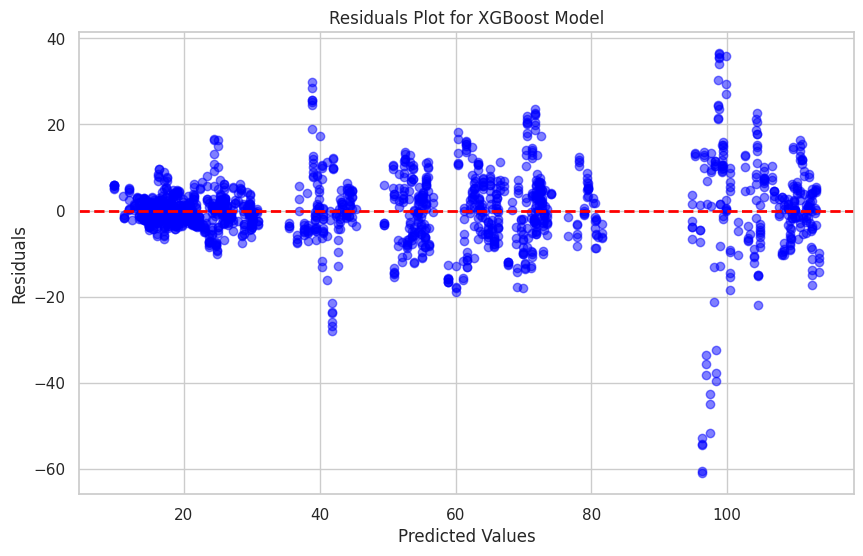

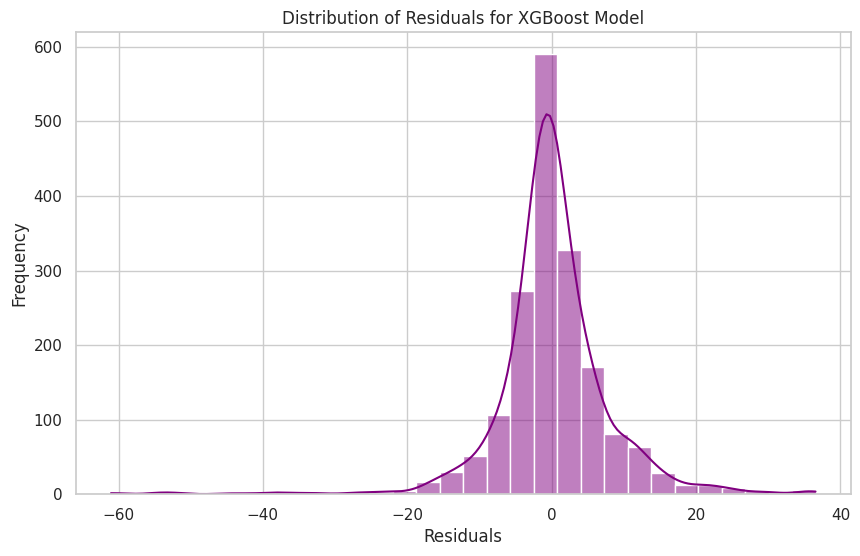

In [22]:
# Plot residuals scatter plot

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals Plot for XGBoost Model')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Plot distribution of residuals (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.title('Distribution of Residuals for XGBoost Model')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [23]:
# Generate future dates for the next 12 months (1 year of forecasting)
future_dates = pd.date_range(start=data.index[-1], periods=15, freq='M')[1:]

In [24]:
# Create a new DataFrame for the future months and year

future_df = pd.DataFrame({'Month': future_dates.month,'Year': future_dates.year})

# Predict future coffee import values
future_predictions = xgboost_model.predict(future_df)
future_predictions

array([101.93549 , 100.40549 , 101.65293 , 102.663765, 103.28181 ,
       104.28515 , 104.43485 , 105.44682 , 104.84808 , 104.520294,
       104.00818 , 103.11176 , 101.93549 , 100.40549 ], dtype=float32)

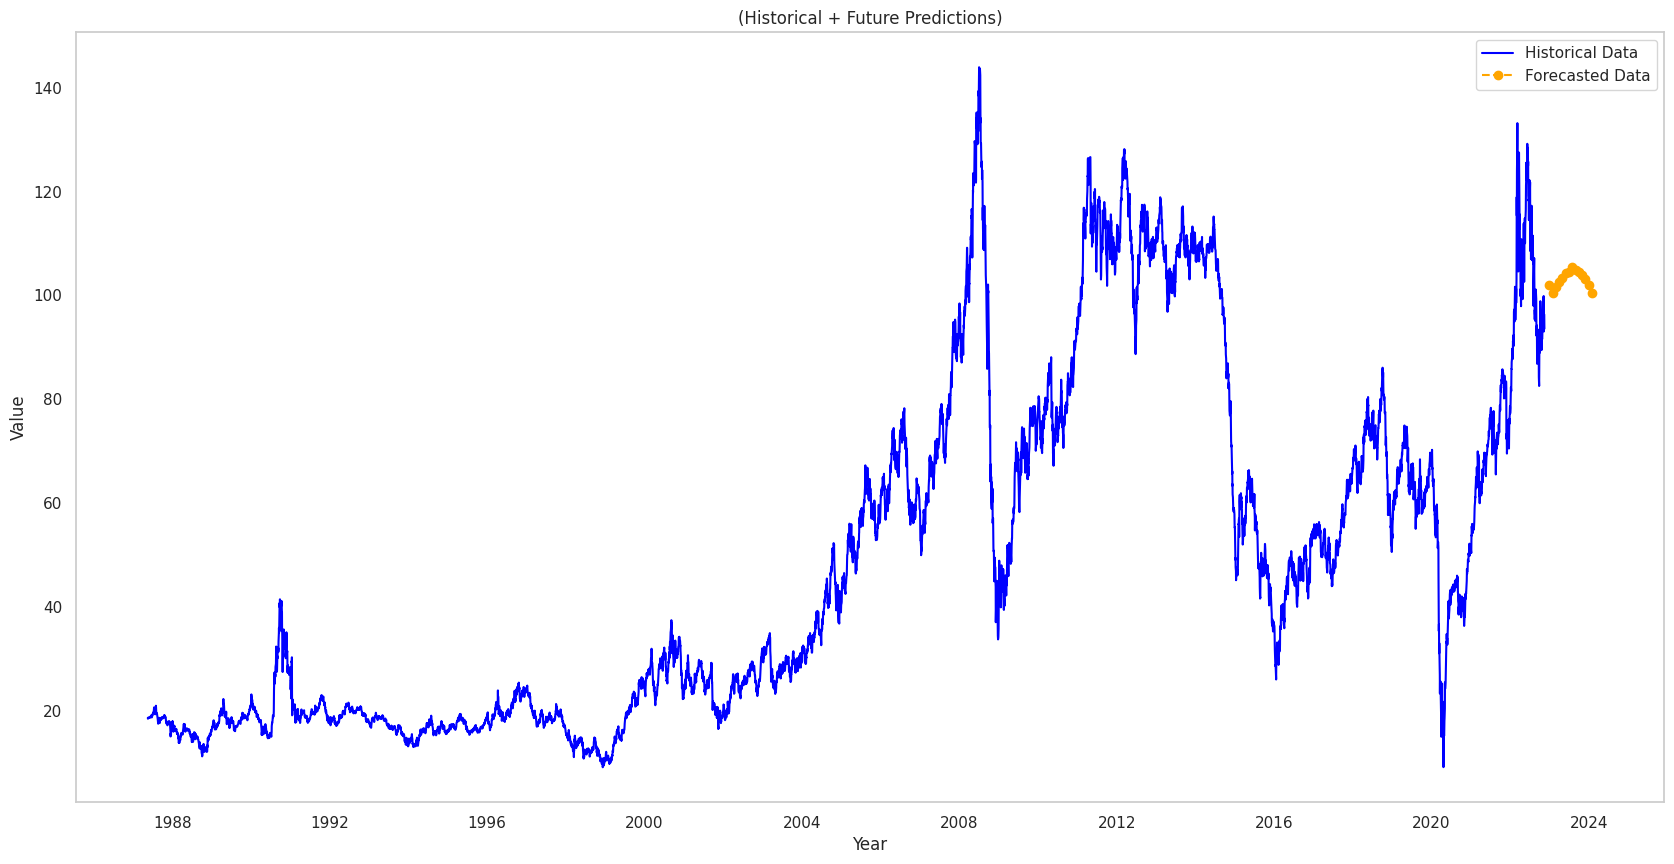

In [25]:
# 2. Plot Historical Data and Forecasted Data

plt.figure(figsize=(20.5, 10))
# Plot historical data
plt.plot(data.index, data['Price'], label='Historical Data', color='blue')
# Plot forecasted future data
plt.plot(future_dates, future_predictions, label='Forecasted Data', color='orange', linestyle='--', marker='o')
# Adding labels and title
plt.title('(Historical + Future Predictions)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(False)
plt.show()

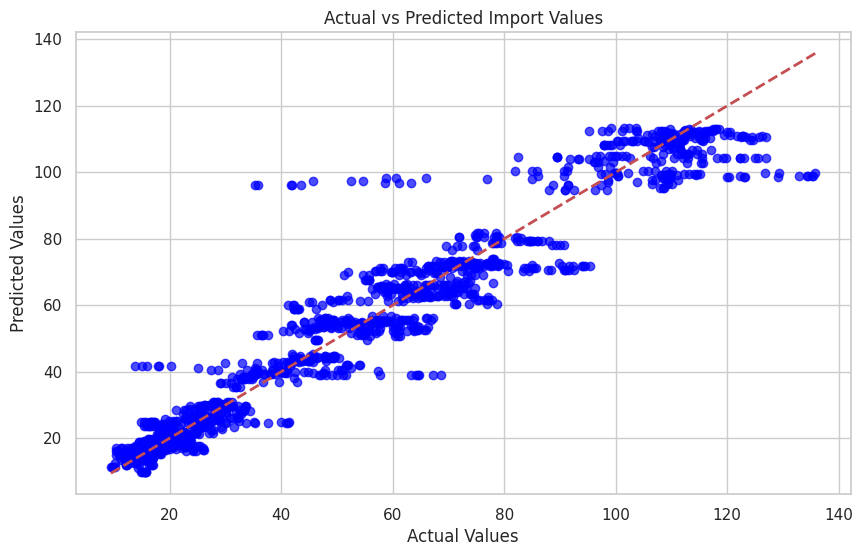

In [26]:
# Plot actual vs predicted values

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Import Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model name (you can adjust this to reflect the actual model used)
model_name = 'XGBoost'

# Predict values using the trained model
y_pred = xgboost_model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Organize the metrics into a dictionary with the model name
metrics = {'Model': [model_name],  # Name of the model
           'RMSE': [rmse],         # Root Mean Squared Error
           'MAE': [mae],           # Mean Absolute Error
           'MSE': [mse],           # Mean Squared Error
           'R²': [r2]              # R-squared (coefficient of determination)
          }

# Convert the dictionary into a DataFrame
metrics_df = pd.DataFrame(metrics)

# Display the DataFrame with the metrics
metrics_df

,Model,RMSE,MAE,MSE,R²
0,XGBoost,8.092595,5.018155,65.490098,0.940471


# Modelo 2 - LghtGBM

In [28]:
import lightgbm as lgb
from lightgbm import LGBMRegressor

# Initialize LightGBM with GPU parameters
lgb_model = lgb.LGBMRegressor(objective='regression',          # Objective for regression
                              n_estimators=1000,               # Number of trees (iterations)
                              learning_rate=0.1,               # Learning rate
                              max_depth=6,                     # Maximum depth of trees
                              subsample=0.8,                   # Subsampling for the rows
                              colsample_bytree=0.8,            # Subsampling for the columns
                              reg_alpha=0.01,                  # L1 regularization
                              reg_lambda=1,                    # L2 regularization
                              min_child_weight=1,              # Minimum sum of instance weight in a child
                              random_state=42                  # For reproducibility
                             )

# Define evaluation set (training and validation sets)
eval_set = [(X_train, y_train), (X_test, y_test)]

# Train the LightGBM model with epoch tracking and early stopping
lgb_model.fit(X_train, y_train,
              eval_set=eval_set, # Set of data to evaluate performance
              eval_metric='rmse' # Evaluation metric: Root Mean Squared Error (RMSE)
             )

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003847 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 50
[LightGBM] [Info] Number of data points in the train set: 7208, number of used features: 2
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Start training from score 48.454806
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

LGBMRegressor(colsample_bytree=0.8, max_depth=6, min_child_weight=1,
              n_estimators=1000, objective='regression', random_state=42,
              reg_alpha=0.01, reg_lambda=1, subsample=0.8)

In [29]:
# Predict on the test set
y_pred_lgb = lgb_model.predict(X_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [30]:
# Calculate residuals
residuals_lgb = y_test - y_pred_lgb

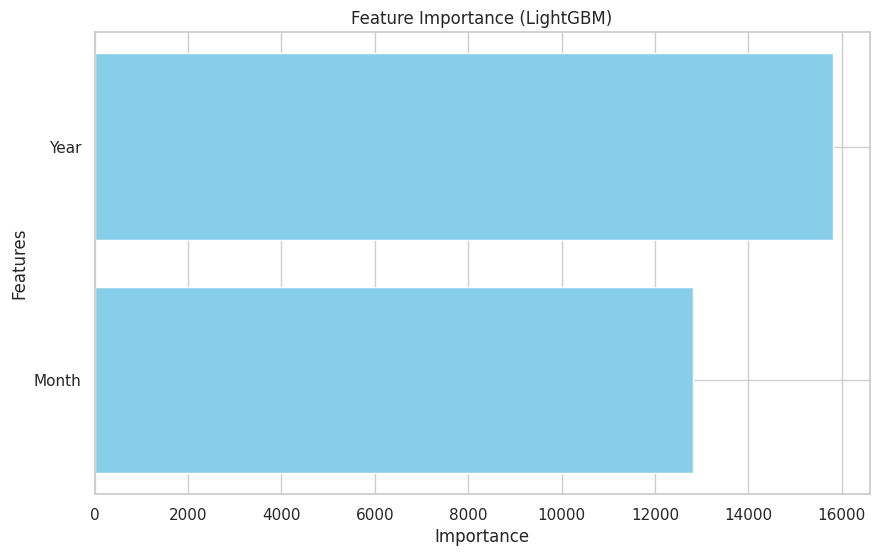

In [31]:
# Get feature importances from the trained LightGBM model
feature_importances = lgb_model.feature_importances_

# Assuming your feature names are stored in a list (e.g., if X_train is a DataFrame)
feature_names = X_train.columns

# Create a DataFrame to organize feature importances
importance_df = pd.DataFrame({'Feature': feature_names,'Importance': feature_importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importance (LightGBM)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.grid(True)
plt.show()

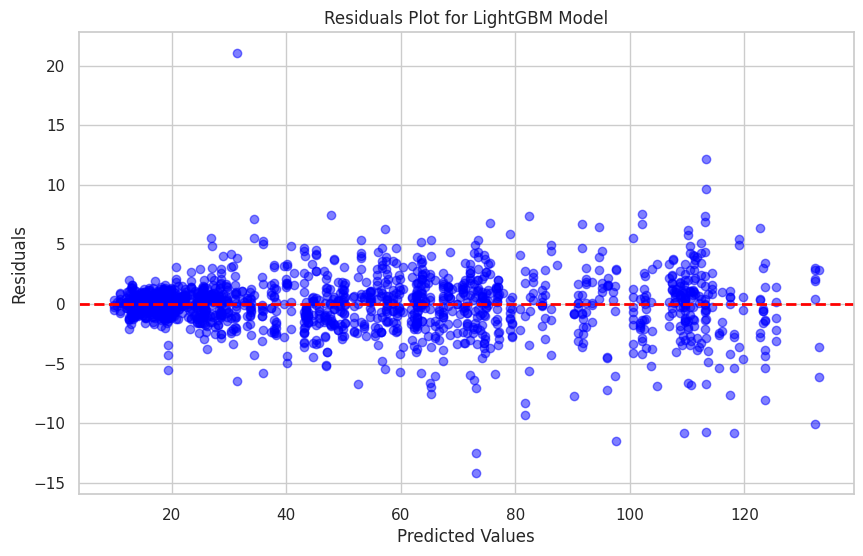

In [32]:
# Plot residuals scatter plot (Residuals vs Predicted)

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_lgb, residuals_lgb, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals Plot for LightGBM Model')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

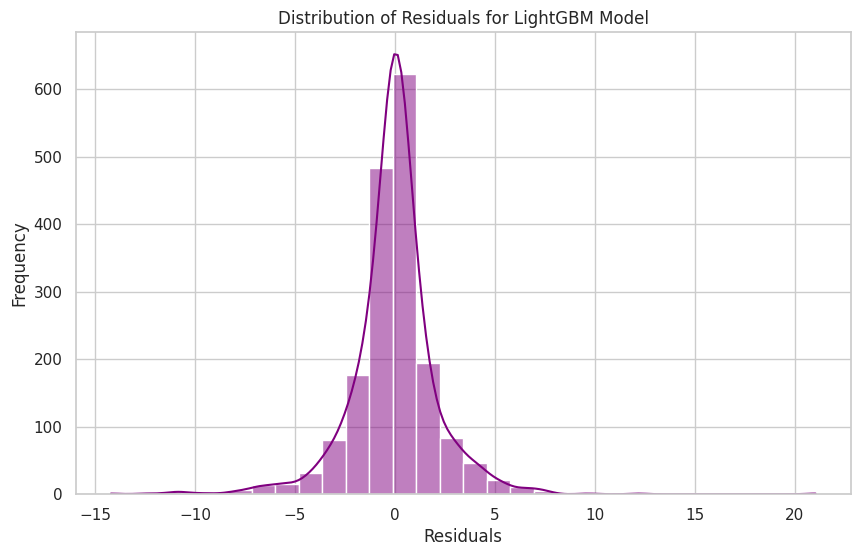

In [35]:
# Plot distribution of residuals (Histogram)

plt.figure(figsize=(10, 6))
sns.histplot(residuals_lgb, bins=30, kde=True, color='purple')
plt.title('Distribution of Residuals for LightGBM Model')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

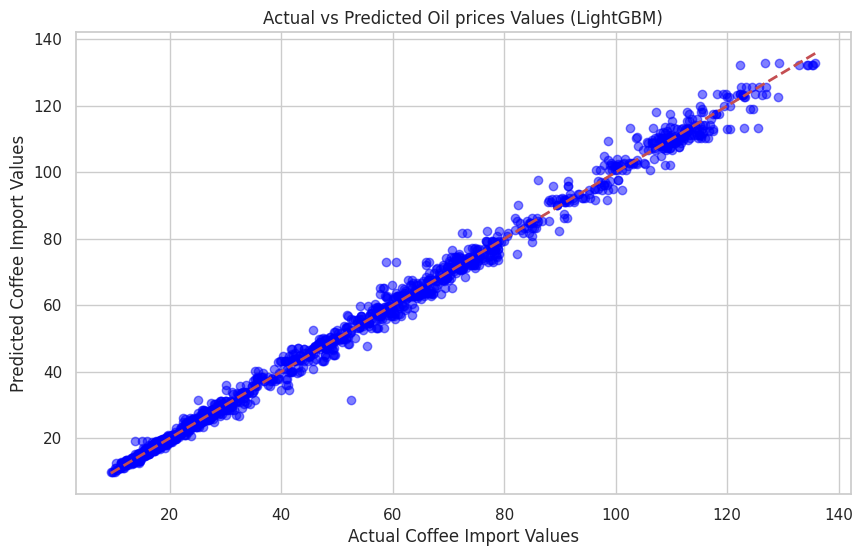

In [36]:
# Plot Actual vs Predicted values using a scatter plot

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lgb, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Add 45-degree reference line

# Add labels and title
plt.title('Actual vs Predicted Oil prices Values (LightGBM)')
plt.xlabel('Actual Coffee Import Values')
plt.ylabel('Predicted Coffee Import Values')
plt.grid(True)
plt.show()

In [37]:
# Generate future dates for the next 12 months (1 year of forecasting)

future_dates = pd.date_range(start=data.index[-1], periods=10, freq='M')[1:]

In [38]:
# Create a new DataFrame for the future months and year
future_df = pd.DataFrame({'Month': future_dates.month,'Year': future_dates.year})

# Predict future coffee import values
future_predictions = lgb_model.predict(future_df)
future_predictions

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


array([ 88.91815164,  86.29089867,  97.472607  , 118.12745418,
       104.7984808 , 113.35525438, 123.59059932, 112.14584363,
       100.56396756])

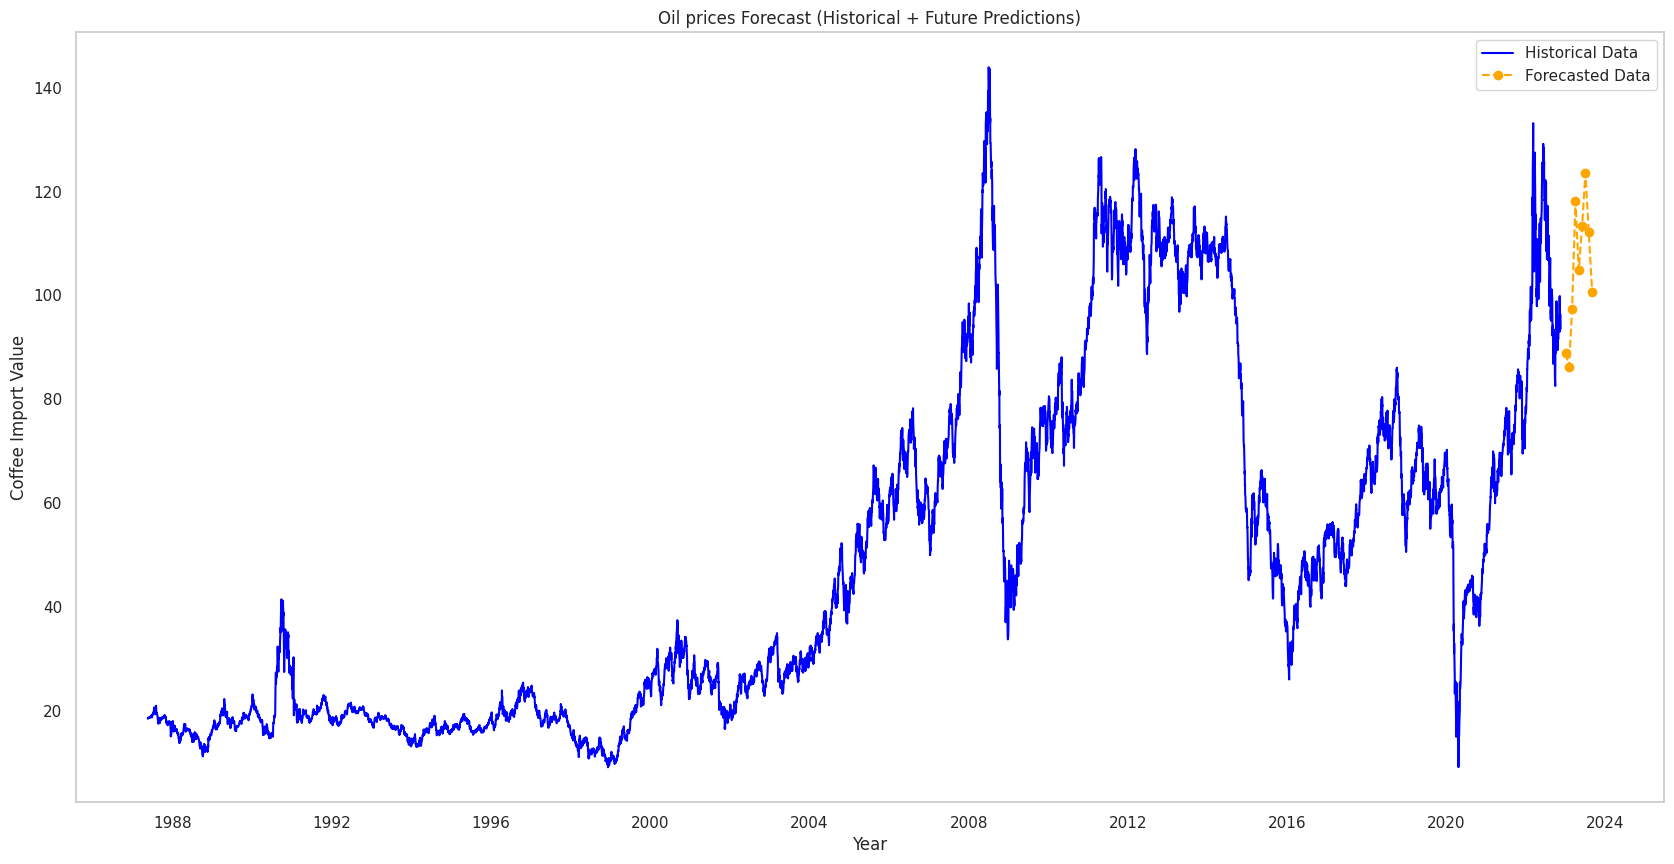

In [39]:
# 2. Plot Historical Data and Forecasted Data

plt.figure(figsize=(20.5, 10))

# Plot historical data
plt.plot(data.index, data['Price'], label='Historical Data', color='blue')

# Plot forecasted future data
plt.plot(future_dates, future_predictions, label='Forecasted Data', color='orange', linestyle='--', marker='o')

# Adding labels and title
plt.title('Oil prices Forecast (Historical + Future Predictions)')
plt.xlabel('Year')
plt.ylabel('Coffee Import Value')
plt.legend()
plt.grid(False)
plt.show()

In [40]:
# Calculate metrics

mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mse_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

# Create DataFrame with metrics
metrics_lgb = {'Model': ['LightGBM'],
               'RMSE': [rmse_lgb],
               'MAE': [mae_lgb],
               'MSE': [mse_lgb],
               'R²': [r2_lgb]}

# Convert dictionary to DataFrame
metrics_lgb_df = pd.DataFrame(metrics_lgb)

# Display the DataFrame
metrics_lgb_df

,Model,RMSE,MAE,MSE,R²
0,LightGBM,2.17124,1.395082,4.714284,0.995715


In [41]:
# Model 3

In [42]:
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Define the models to be tested
# Define the models to be tested with `verbose=-1` to suppress warnings for LightGBM

models = {'CatBoost': CatBoostRegressor(verbose=0, n_estimators=100, learning_rate=0.1),
          'DecisionTree': DecisionTreeRegressor(),
          'RandomForest': RandomForestRegressor(n_estimators=100),
          'GradientBoosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)}

# Loop through each model, fit, and predict
for model_name, model in models.items():
    print(f'Training {model_name}...')
    
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Output just to indicate that the model was trained and predictions were made
    print(f'{model_name} model trained and predictions made.')

Training CatBoost...
CatBoost model trained and predictions made.
Training DecisionTree...
DecisionTree model trained and predictions made.
Training RandomForest...
RandomForest model trained and predictions made.
Training GradientBoosting...
GradientBoosting model trained and predictions made.


In [43]:
# Generate future dates for the next 12 months (assuming future forecasting)

future_dates = pd.date_range(start=data.index[-1], periods=13, freq='M')[1:]
future_dates

DatetimeIndex(['2022-12-31', '2023-01-31', '2023-02-28', '2023-03-31',
               '2023-04-30', '2023-05-31', '2023-06-30', '2023-07-31',
               '2023-08-31', '2023-09-30', '2023-10-31', '2023-11-30'],
              dtype='datetime64[ns]', freq='ME')

Training CatBoost...


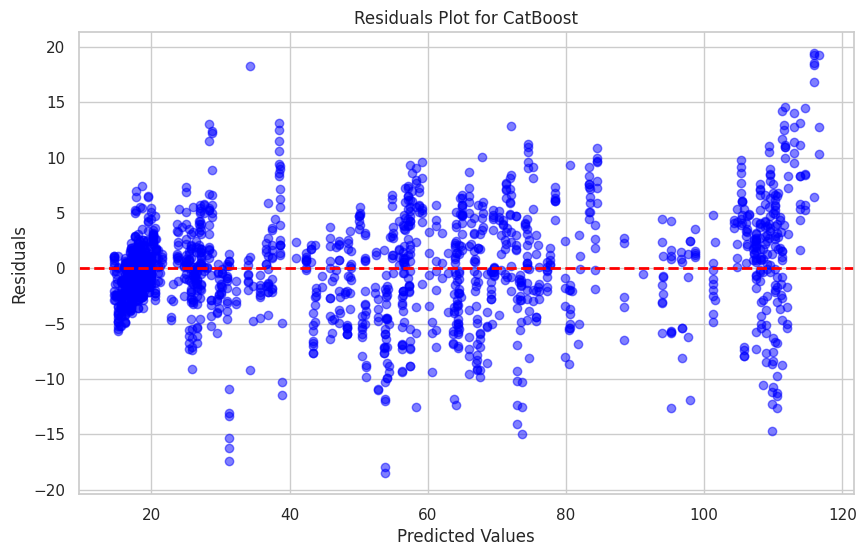

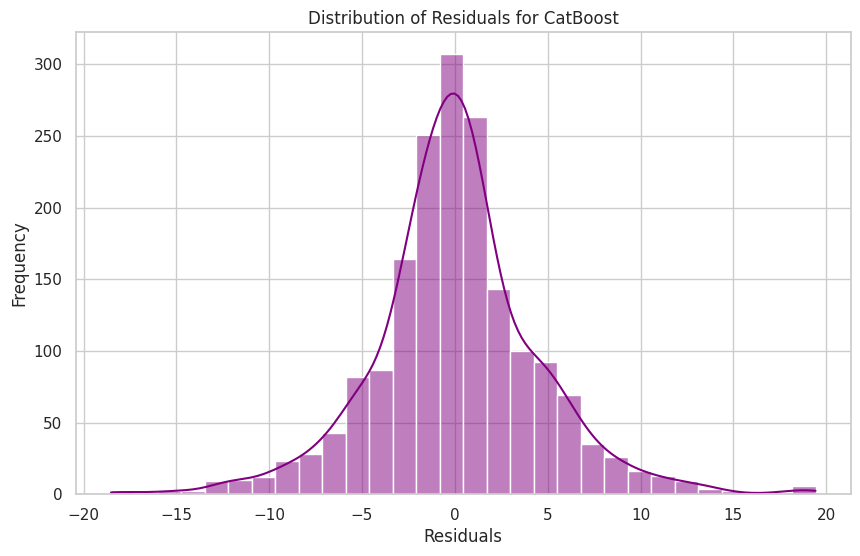

Training DecisionTree...


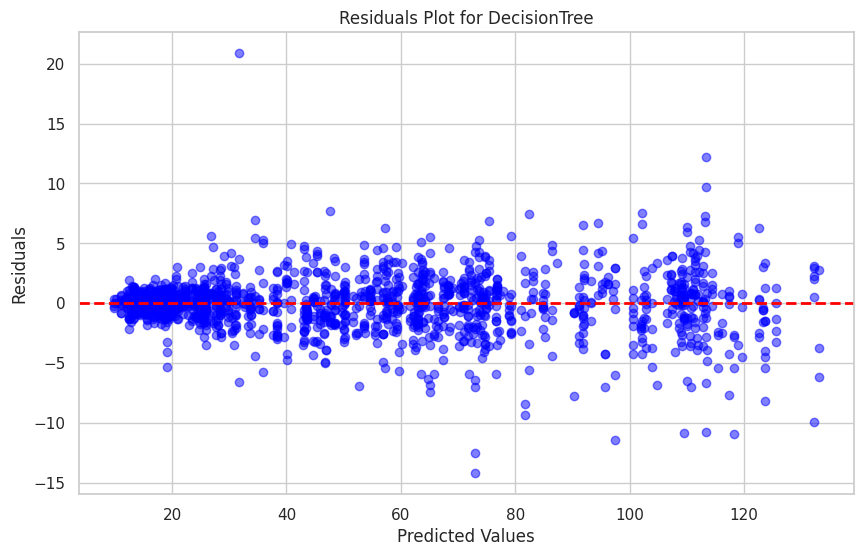

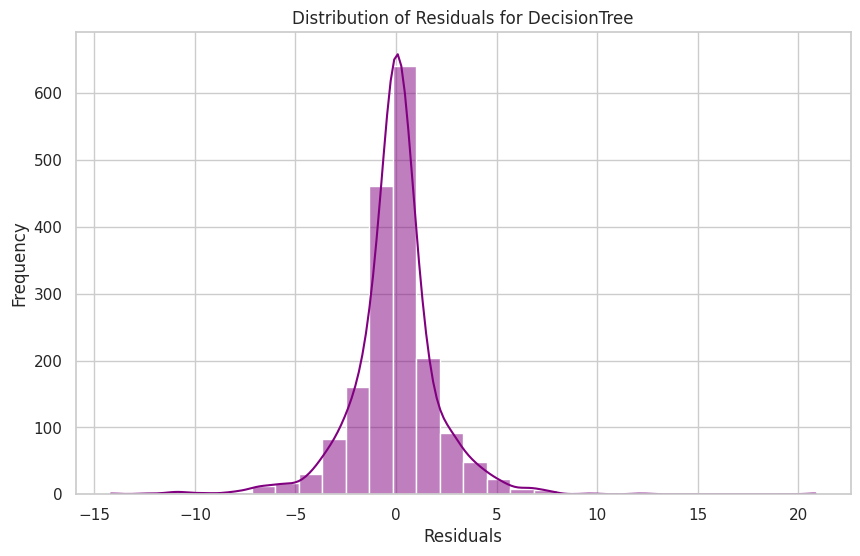

Training RandomForest...


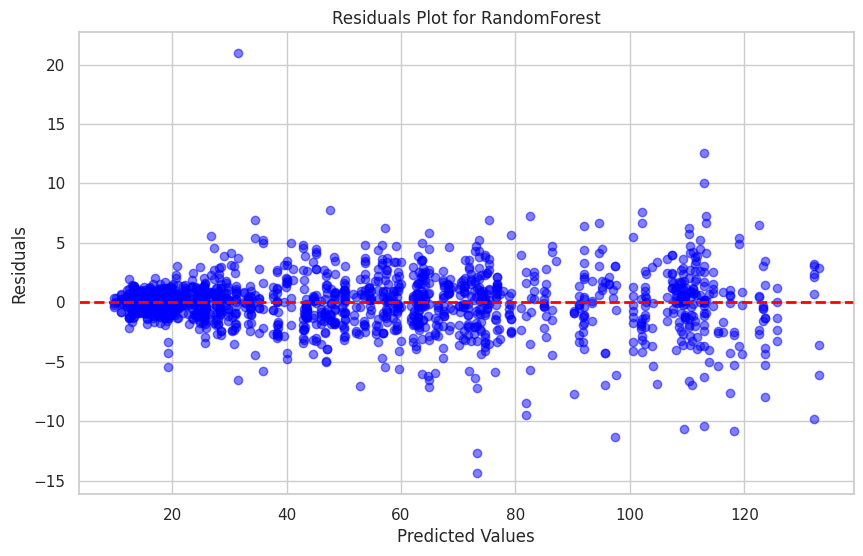

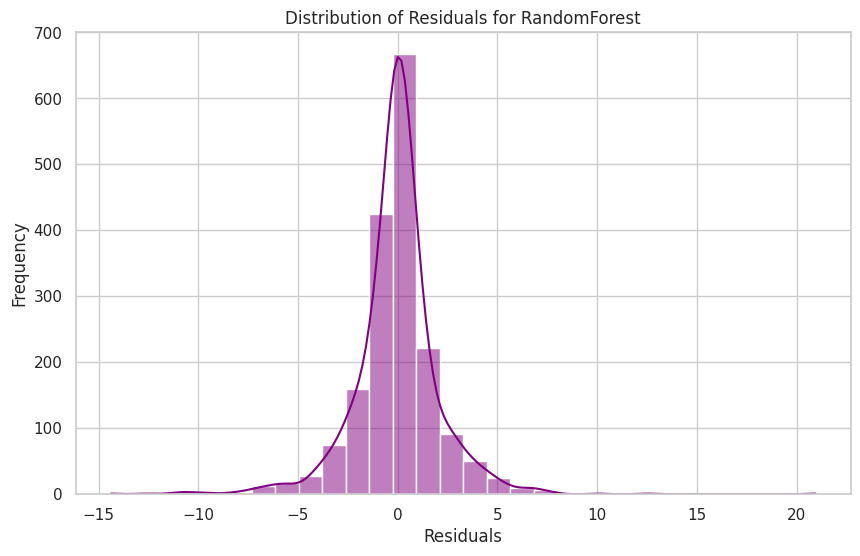

Training GradientBoosting...


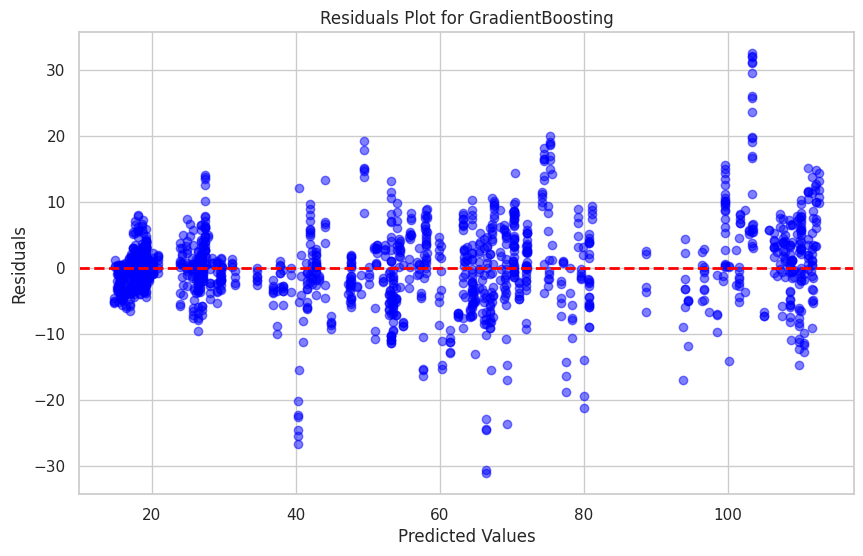

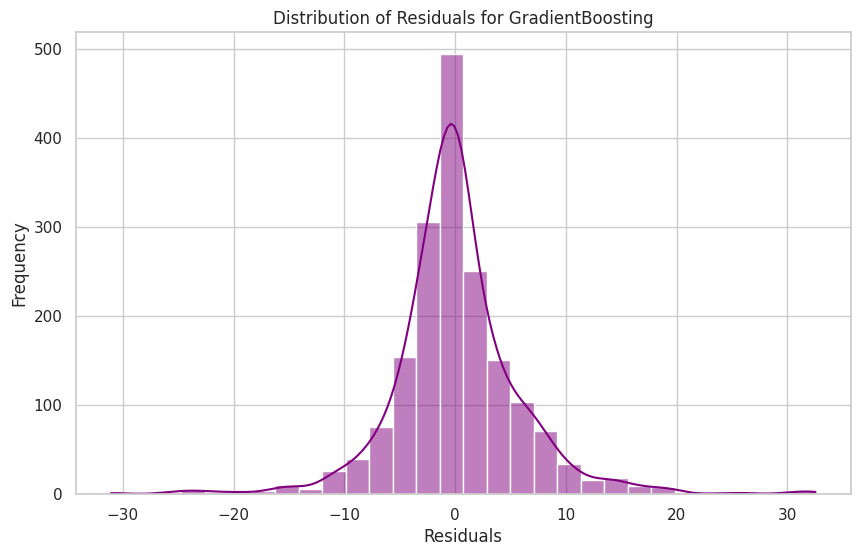

In [44]:
# Loop through each model, fit, predict, and plot residuals

for model_name, model in models.items():
    print(f'Training {model_name}...')

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate residuals
    residuals = y_test - y_pred

    # Plot the residuals
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
    plt.title(f'Residuals Plot for {model_name}')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.grid(True)
    plt.show()

    # Optionally, you can also plot the distribution of residuals
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, bins=30, kde=True, color='purple')
    plt.title(f'Distribution of Residuals for {model_name}')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

Training CatBoost...


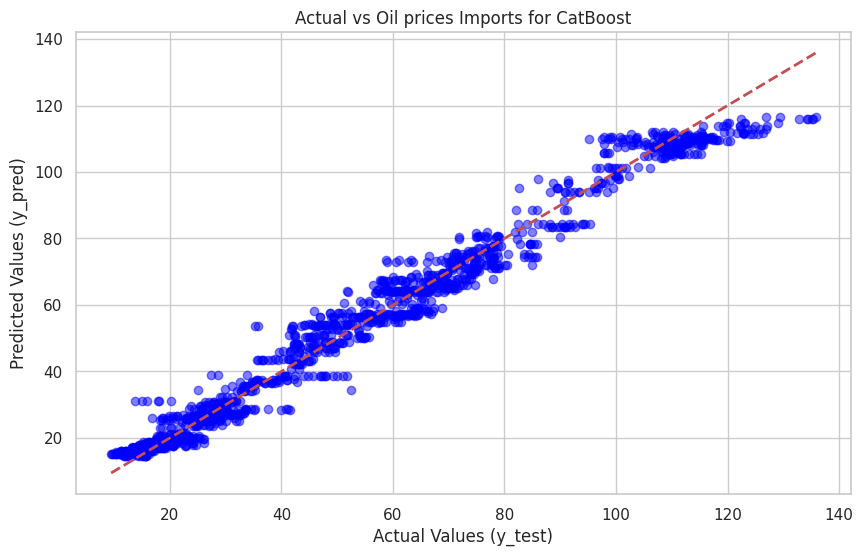

Training DecisionTree...


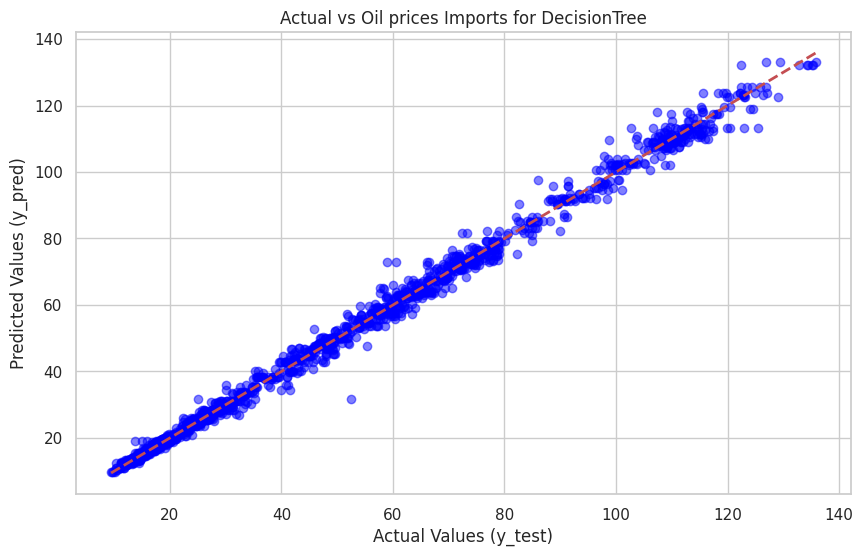

Training RandomForest...


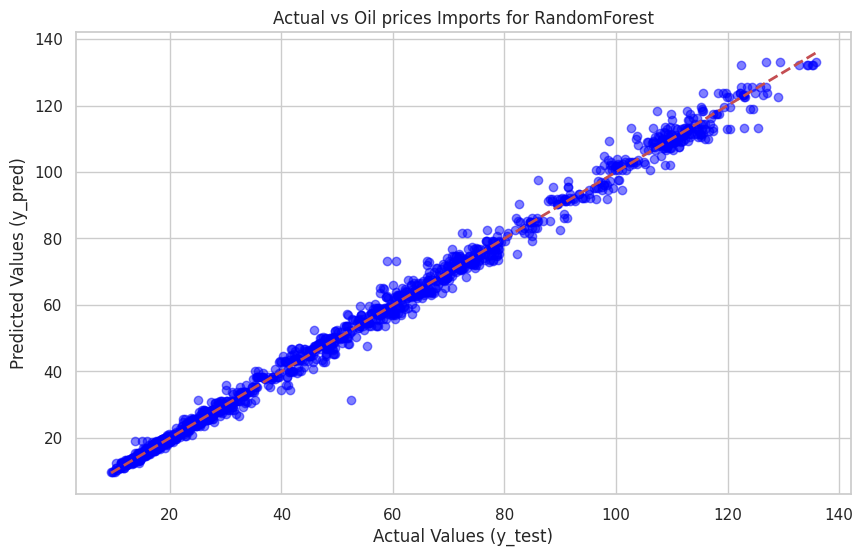

Training GradientBoosting...


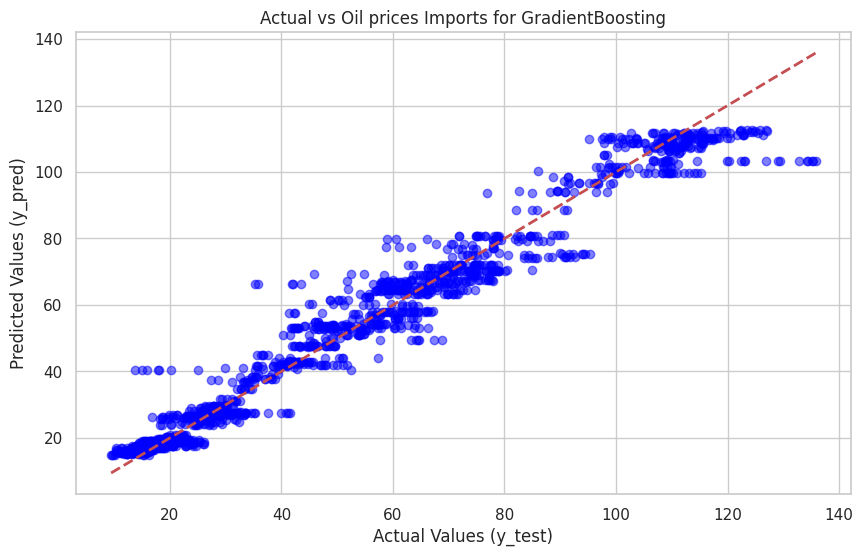

In [45]:
# Loop through each model, fit, predict, and plot Actual vs Predicted

for model_name, model in models.items():
    print(f'Training {model_name}...')
    
    # Fit the model
    model.fit(X_train, y_train)
 
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Plot Actual vs Predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line
    plt.title(f'Actual vs Oil prices Imports for {model_name}')
    plt.xlabel('Actual Values (y_test)')
    plt.ylabel('Predicted Values (y_pred)')
    plt.grid(True)
    plt.show()

Training CatBoost...


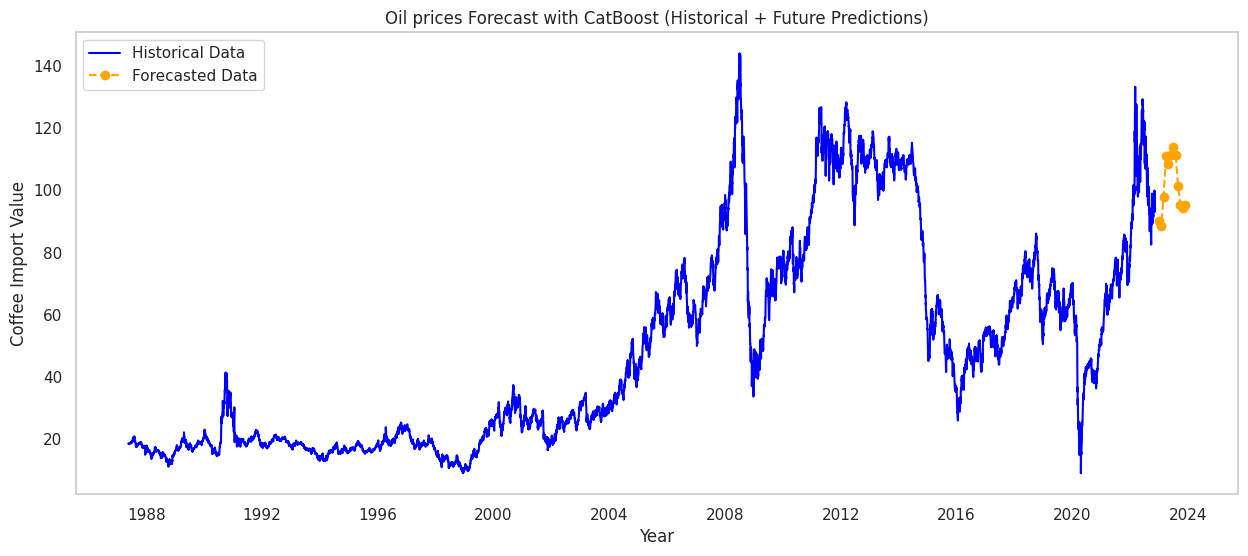

Training DecisionTree...


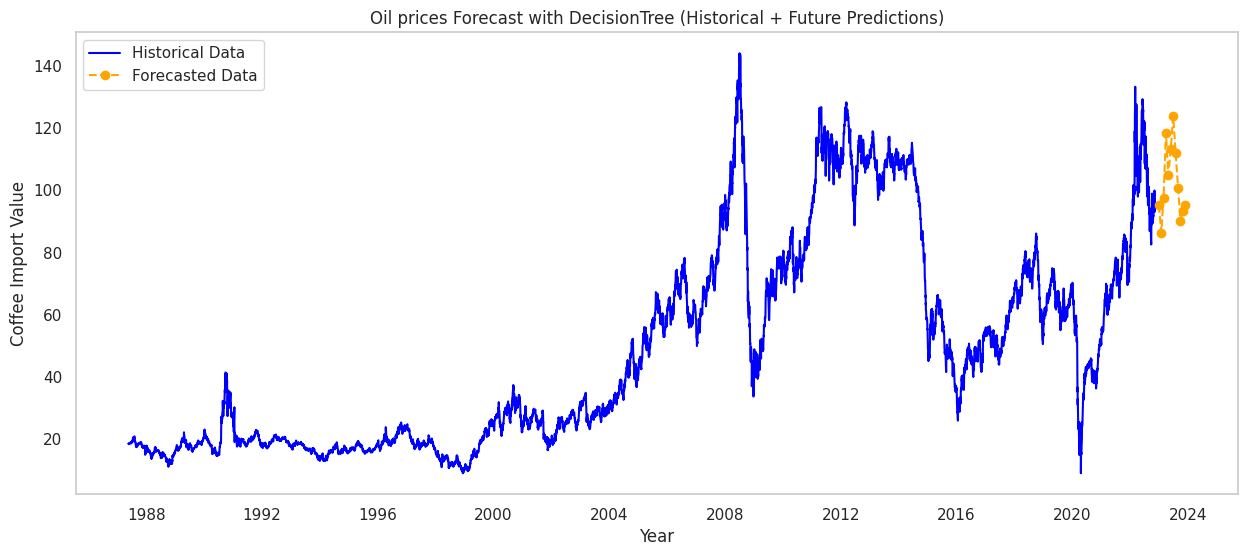

Training RandomForest...


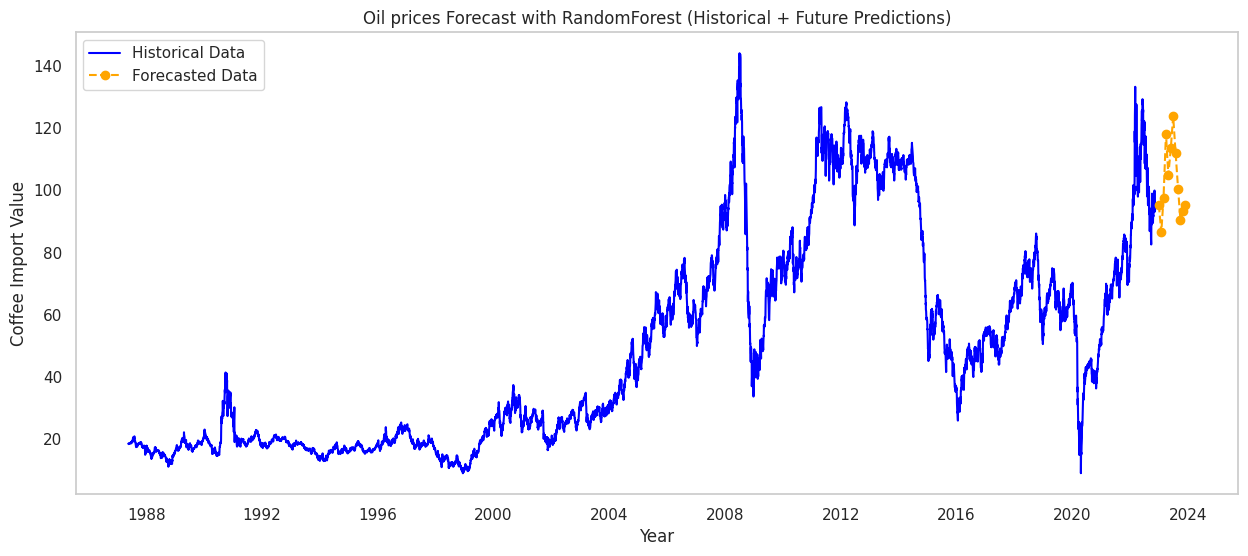

Training GradientBoosting...


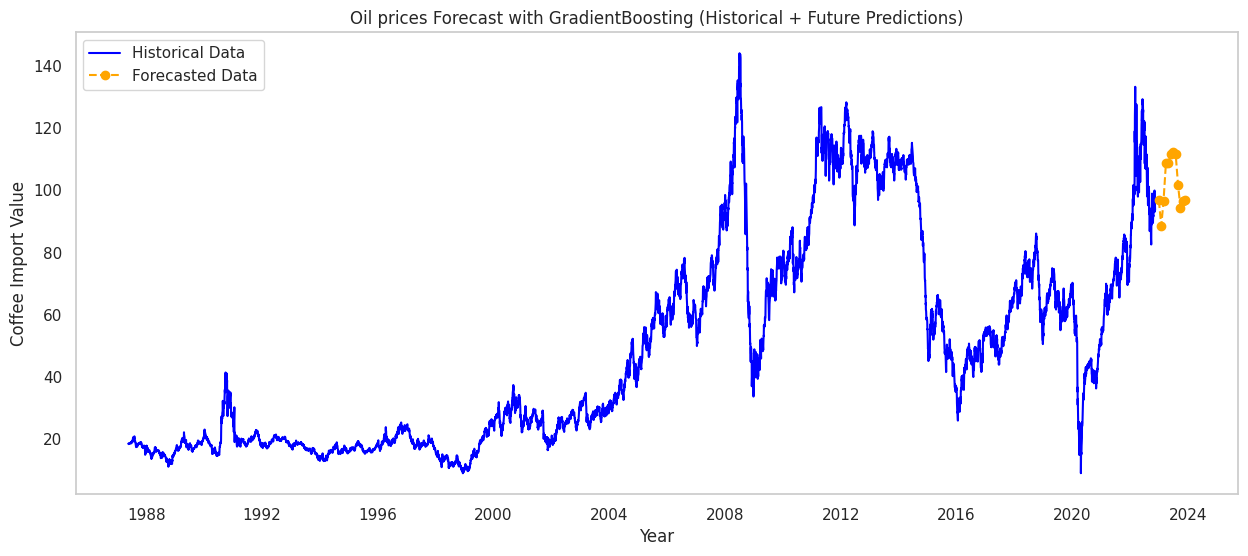

In [46]:
# Loop through each model, fit, predict, and plot the historical data and forecasted data

for model_name, model in models.items():
    print(f'Training {model_name}...')

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions on the test set (for forecasting future values)
    future_df = pd.DataFrame({'Month': future_dates.month,'Year': future_dates.year})
    
    # Predict the future values
    future_predictions = model.predict(future_df)

    # Plot historical data
    plt.figure(figsize=(15, 6))
    plt.plot(data.index, data['Price'], label='Historical Data', color='blue')

    # Plot forecasted data as a line
    plt.plot(future_dates, future_predictions, label='Forecasted Data', color='orange', linestyle='--', marker='o')
    
    # Add labels and title
    plt.title(f'Oil prices Forecast with {model_name} (Historical + Future Predictions)')
    plt.xlabel('Year')
    plt.ylabel('Coffee Import Value')
    plt.legend()
    plt.grid(False)
    plt.show()

In [47]:
# Dictionary to store evaluation metrics for each model

results = {}

# Loop through each model, fit, predict, and calculate metrics
for model_name, model in models.items():
    
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store the results for each model in the dictionary
    results[model_name] = {'MAE': mae,
                           'MSE': mse,
                           'RMSE': rmse,
                           'R²': r2}

# Convert the results dictionary into a DataFrame for easy viewing
results_df = pd.DataFrame(results).T

# Display the DataFrame with the metrics
results_df

,MAE,MSE,RMSE,R²
CatBoost,3.205591,19.908920,4.461941,0.981903
DecisionTree,1.387215,4.677235,2.162692,0.995748
RandomForest,1.386412,4.679325,2.163175,0.995747
GradientBoosting,3.894592,34.593826,5.881652,0.968555
